# Project 1 Notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('admissions.csv')

Questions to explore:
* What is the percentage of candidates with a GPA of 3.5 or higher who were admitted?
* Is GPA correlated with GRE scores?
* What is the average GPA for each prestige category?
* What is the admission percentage for each prestige category?

In [98]:
df

,admit,gre,gpa,prestige
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0
5,1.0,760.0,3.00,2.0
6,1.0,560.0,2.98,1.0
7,0.0,400.0,3.08,2.0
8,1.0,540.0,3.39,3.0
9,0.0,700.0,3.92,2.0


In [10]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


<table style="margin:0;">
    <tr>
        <th>Average admission rate</th><th>Average GRE Score</th><th>Average GPA</th><th>Total records</th>
    </tr>
    <tr>
        <td>31.75%</td><td>588</td><td>3.39</td><td>400</td>
    </tr>
</table>


# Question 1:
What is the percentage of candidates with a GPA of 3.5 or higher who were admitted to any school?

In [54]:
three_five_gpas = df[df.gpa >= 3.5].shape[0]
candidates = df[(df.gpa >= 3.5) & (df.admit == 1)].shape[0]
all_admitted = df[df.admit == 1].shape[0]

percentage = (candidates / three_five_gpas) * 100
percentage = float(format(percentage, '.2f'))
percentage

42.5

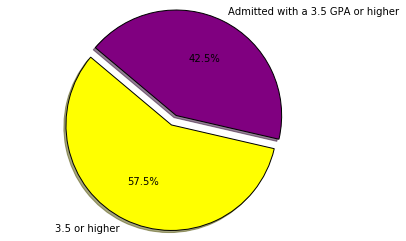

In [65]:
# Data to plot
labels = '3.5 or higher', 'Admitted with a 3.5 GPA or higher'
sizes = [three_five_gpas - candidates, candidates]
colors = ['yellow', 'purple']
explode = (0, .1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# Question 2:
Is GPA correlated with GRE scores?

In [77]:
#let's return all of the cells where either GPA cell is blank or null

empty_gpa_gre_cell = df[(df.gpa.isnull()) | (df.gre.isnull())]
empty_gpa_gre_cell

,admit,gre,gpa,prestige
187,0.0,NaN,3.36,2.0
212,0.0,NaN,2.87,2.0
236,1.0,660.0,NaN,NaN
187,NaN,NaN,3.36,NaN


<p>Let's drop these values from a copy of the data frame, since they're so few.</p>

In [114]:
df.drop(df.index[187], inplace=True)
df.drop(df.index[212], inplace=True)
df.drop(df.index[236], inplace=True)

In [116]:
df.shape

(395, 4)

In [117]:
# Next, we'll get a Pearson correlation between column A and B
df['gre'].corr(df['gpa'])

0.38632018113840988

As we see can above, there's correlation coefficient of .386 between GRE and GPA, a relatively moderate correlation. Let's graph it out and see where points fall.

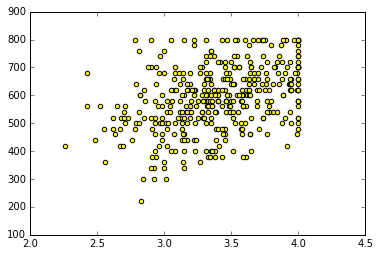

In [128]:
gpa_gre_plot = plt.scatter(df['gpa'], df['gre'], c='yellow')
gpa_gre_plot

# Question 3:

What is the average GPA for each prestige category?

In [160]:
# Return rows where Prestige is 1
prestige_1 = df[df.prestige == 1].mean()
# Get the GPA mean for the prestige 1 rows 
p1_gpa = prestige_1[2]
p1_gpa = float(format(p1_gpa, '.2f'))

# Prestige 2 Average 
prestige_2 = df[df.prestige == 2].mean()
p2_gpa = prestige_2[2]
p2_gpa = float(format(p2_gpa, '.2f'))

#Prestige 3 Average
prestige_3 = df[df.prestige == 3].mean()
p3_gpa = prestige_3[2]
p3_gpa = float(format(p3_gpa, '.2f'))

#Prestige 4 Average
prestige_4 = df[df.prestige == 4].mean()
p4_gpa = prestige_4[2]
p4_gpa = float(format(p4_gpa, '.2f'))

print("Prestige 1 schools average gpa: {}".format(p1_gpa))
print("Prestige 2 schools average gpa: {}".format(p2_gpa))
print("Prestige 3 schools average gpa: {}".format(p3_gpa))
print("Prestige 4 schools average gpa: {}".format(p4_gpa))

Prestige 1 schools average gpa: 3.45
Prestige 2 schools average gpa: 3.37
Prestige 3 schools average gpa: 3.44
Prestige 4 schools average gpa: 3.33


Surprisingly, the average GPA seems to be relatively similar across prestige ranks.

# Now let's graph it

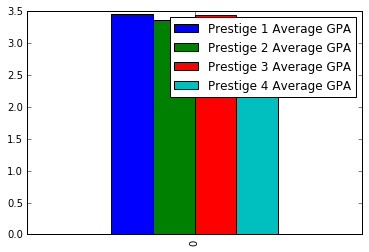

In [214]:
data = {'Prestige 1 Average GPA' : p1_gpa, 
        'Prestige 2 Average GPA' : p2_gpa, 
        'Prestige 3 Average GPA' : p3_gpa, 
        'Prestige 4 Average GPA' : p4_gpa}
gpa_df = pd.DataFrame(data=data, index=np.arange(1))

gpa_df.plot.bar(align="center")


# Question 4: What is the admission percentage for each prestige category?

The purpose of this question is to gain some insight into how many applicants are accepted into each prestige category of schools. My hypothesis is that the Prestige 1 schools, as the more prestigious schools, will have a lower percentage of accepted applicants than other schools.

In [202]:
# Calculate admission rate for applicants to prestige 1 schools
p1_admitted = df[(df.admit == 1) & (df.prestige == 1)].shape[0]
p1_total = df[df.prestige == 1].shape[0]
p1_acceptance_rate = float(format((p1_admitted / p1_total) * 100, '.2f'))
print("{}%".format(p1_acceptance_rate))

53.33%


In [204]:
# Calculate admission rate for remaining prestige categories

#Prestige 2
p2_admitted = df[(df.admit == 1) & (df.prestige == 2)].shape[0]
p2_total = df[df.prestige == 2].shape[0]
p2_acceptance_rate = float(format((p2_admitted / p2_total) * 100, '.2f'))

#Prestige 3
p3_admitted = df[(df.admit == 1) & (df.prestige == 3)].shape[0]
p3_total = df[df.prestige == 3].shape[0]
p3_acceptance_rate = float(format((p3_admitted / p3_total) * 100, '.2f'))

#Prestige 4
p4_admitted = df[(df.admit == 1) & (df.prestige == 4)].shape[0]
p4_total = df[df.prestige == 4].shape[0]
p4_acceptance_rate = float(format((p4_admitted / p4_total) * 100, '.2f'))

print("Prestige 2 admission rate: {}%".format(p2_acceptance_rate))
print("Prestige 3 admission rate: {}%".format(p3_acceptance_rate))
print("Prestige 4 admission rate: {}%".format(p4_acceptance_rate))


Prestige 2 admission rate: 35.81%
Prestige 3 admission rate: 22.69%
Prestige 4 admission rate: 18.18%


The results above are fairly surprising; as a school's prestige decreases, the admission rate actually seems to go down, which is not what one would expect. That said, this could in part be explained by how the data was sampled. Prestige category 4 applicants are particularly underrepresented, making up only 66 of the 400 data points. 

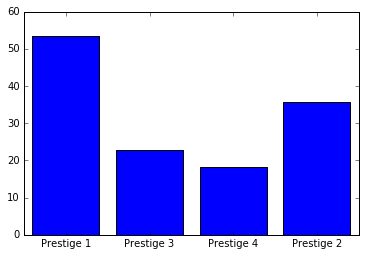

In [217]:
ds = {'Prestige 1': p1_acceptance_rate,
      'Prestige 2': p2_acceptance_rate,
      'Prestige 3': p3_acceptance_rate,
      'Prestige 4': p4_acceptance_rate,
     }

plt.bar(range(len(ds)), ds.values(), align='center')
plt.xticks(range(len(ds)), ds.keys())
plt.yticks()

plt.show()